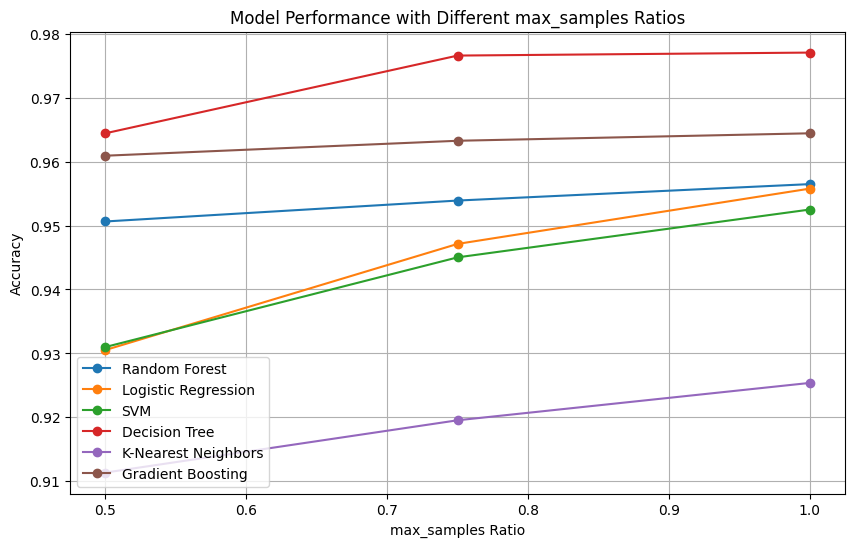

Performance of Random Forest with different max_samples ratios:
  - max_samples = 0.5: Accuracy = 0.9506
  - max_samples = 0.75: Accuracy = 0.9539
  - max_samples = 1.0: Accuracy = 0.9565
--------------------------------------------------
Performance of Logistic Regression with different max_samples ratios:
  - max_samples = 0.5: Accuracy = 0.9305
  - max_samples = 0.75: Accuracy = 0.9471
  - max_samples = 1.0: Accuracy = 0.9558
--------------------------------------------------
Performance of SVM with different max_samples ratios:
  - max_samples = 0.5: Accuracy = 0.9310
  - max_samples = 0.75: Accuracy = 0.9450
  - max_samples = 1.0: Accuracy = 0.9525
--------------------------------------------------
Performance of Decision Tree with different max_samples ratios:
  - max_samples = 0.5: Accuracy = 0.9644
  - max_samples = 0.75: Accuracy = 0.9766
  - max_samples = 1.0: Accuracy = 0.9771
--------------------------------------------------
Performance of K-Nearest Neighbors with differen

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Load dataset (replace with actual data loading process)
data = pd.read_csv('Featured_dataset.csv')

# Ensure 'label' column is present as target column
target_column = 'label'

# Features (X) and Target (y)
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target variable

# Handle missing data using SimpleImputer (for both numerical and categorical columns)
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Optionally scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing with a placeholder
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical variables
])

# Apply preprocessing for both numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models to test
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# max_samples ratios to experiment with
max_samples_ratios = [0.5, 0.75, 1.0]

# Dictionary to store results
results = {model_name: [] for model_name in models.keys()}

# Function to train and evaluate a model with different max_samples
for ratio in max_samples_ratios:
    # Resample the training data with the given max_samples ratio
    X_train_sampled, y_train_sampled = resample(X_train, y_train, n_samples=int(len(X_train) * ratio), random_state=42)

    for model_name, model in models.items():
        # Create a pipeline that first preprocesses the data, then trains the model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        # Train the model
        pipeline.fit(X_train_sampled, y_train_sampled)
        
        # Predict and calculate accuracy
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the result
        results[model_name].append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))

for model_name, accuracies in results.items():
    plt.plot(max_samples_ratios, accuracies, label=model_name, marker='o')

plt.title('Model Performance with Different max_samples Ratios')
plt.xlabel('max_samples Ratio')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Compare all models across different max_samples ratios
for model_name, accuracies in results.items():
    print(f"Performance of {model_name} with different max_samples ratios:")
    for ratio, accuracy in zip(max_samples_ratios, accuracies):
        print(f"  - max_samples = {ratio}: Accuracy = {accuracy:.4f}")
    print('-' * 50)
